# Insertion Sort
## Sort function

In [2]:
import numpy as np
import time
import itertools
import matplotlib.pyplot as plt

In [3]:
def in_sort(A,aLen):
    for i in range(1,aLen):
        temp = A[i];
        j=i-1;
        while(temp<A[j] and j>=0):
            A[j+1]=A[j]
            j-=1
        A[j+1]=temp
    return A

#Modified version, returns steps and comparisons
def in_sort_Mod(A,aLen):
    #init counters
    steps,comps,swaps = 0,0,0
    t=np.zeros(aLen,dtype=int)
    i = 1
    while(i<aLen):
        temp = A[i]
        j=i-1
        while(True):
            comps+=1
            t[i]+=1
            if(j<0):break
            if(temp>=A[j]):break
            swaps+=1
            A[j+1]=A[j]
            j-=1;steps+=3
        A[j+1]=temp;steps+=1;
        i+=1;steps+=4
    steps+=1
    return A,steps,comps,swaps,t

Here we test the function:

In [4]:
A = np.array([0,5,1,3,4,7,9])
print('A > ',A)
print('ordered A > ',in_sort(A,len(A)))

A >  [0 5 1 3 4 7 9]
ordered A >  [0 1 3 4 5 7 9]


###### Custom permutations class:

In [5]:
class MyPerm:
    def __init__(self):
        self.A = [] #contains permutations
        self.used = [0]*100 #max, 100 permutations, it wont reach here,so, dont worry :v
        self.curPos=0
        self.perm=[]
    def aux_permutations(self,n):
        if(self.curPos==n):
            self.A.append(list(self.perm))
            return
        self.curPos+=1        
        for i in range(n):
            if(self.used[i]==1): continue
            self.used[i]=1;self.perm.append(i);
            self.aux_permutations(n)
            self.used[i]=0;self.perm.pop()
        self.curPos-=1
    
    def permutations (self,n):
        self.__init__()
        self.aux_permutations(n)
        return self.A

### Steps distribution

In [6]:
#custom function - calc steps
# gets n if it only requires a permutation, and m if requires random permutations
def calc(which,**kwargs):
    n = kwargs.get('n',None)
    m = kwargs.get('m',None)
    #Generate permutations lenght n
    perm = []
    n_perm = 0
    if(which==0):  #itertools
        perm = np.array(list(itertools.permutations(range(n))))
        n_perm = len(perm)
    elif(which==1): #recursive function
        e = MyPerm()
        perm = e.permutations(n)
        n_perm = len(perm)
    else: #random in a range
        perm = np.array([np.random.permutation(n) for i in range(m)])
        n_perm=m
    pasos = np.empty(n_perm)
    comparaciones = np.empty(n_perm)
    sw = np.empty(n_perm)
    t_loop=np.empty([n_perm,n])
    for i in range (n_perm):
        tm = np.copy(perm[i])
        A,steps,comps,swaps,t = in_sort_Mod(tm,n)
        pasos[i]=steps
        comparaciones[i]=comps
        sw[i]=swaps
        t_loop[i] = t
    return pasos,comparaciones,sw,t_loop,perm,n_perm

### Histogram Functions:

In [7]:
def step_hist(pasos,n_perm,n):
    min_steps,max_steps=min(pasos), max(pasos)
    plt.hist(pasos, bins=np.arange(min_steps,max_steps + 1, 1), normed=1)
    plt.title("Probability Density Steps - n = "+str(n))
    plt.xlabel('Steps')
    plt.ylabel('Probaility')
    plt.show()

    #raw data
    vals,counts = np.unique(pasos,return_counts=True)
    print("\nAverage Steps: "+str(np.average(pasos)), "- Min Steps: "+str(min_steps),"- Max Steps: "+str(max_steps))
    print("Probabilities: ")
    for i in range(len(vals)):
        print("P("+str(int(vals[i]))+") = "+str(counts[i]/n_perm))
def comp_hist(comparaciones,n_perm,n):
    #histogram comparisons
    min_steps,max_steps=min(comparaciones), max(comparaciones)
    plt.hist(comparaciones, bins=np.arange(min_steps,max_steps + 1, 1), normed=1)
    plt.title("Probability Density Comparisons - n = "+str(n))
    plt.xlabel('n-comparisons')
    plt.ylabel('Probaility')
    plt.show()

    #raw data
    vals,counts = np.unique(comparaciones,return_counts=True)
    print("\nAverage Comparisons: "+str(np.average(comparaciones))
          , "- Min Comparisons: "+str(min_steps),"- Max Comparisons: "+str(max_steps))
    print("Probabilities for Comparisons: ")
    for i in range(len(vals)):
        print("P("+str(int(vals[i]))+") = "+str(counts[i]/n_perm))
def swap_hist(sw,n_perm,n):
    #histogram swaps
    min_steps,max_steps=min(sw), max(sw)
    plt.hist(sw, bins=np.arange(min_steps,max_steps + 1, 1), normed=1)
    plt.title("Probability Density Swaps - n = "+str(n))
    plt.xlabel('n-swaps')
    plt.ylabel('Probaility')
    plt.show()
    #raw data
    vals,counts = np.unique(sw,return_counts=True)
    print("\nAverage Swaps: "+str(np.average(sw)), "- Min Swaps: "+str(min_steps),"- Max Swaps: "+str(max_steps))
    print("Probabilities for Swaps: ")
    for i in range(len(vals)):
        print("P("+str(int(vals[i]))+") = "+str(counts[i]/n_perm))

Now we execute them:

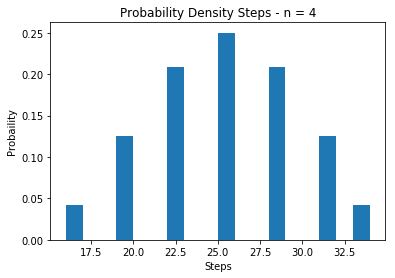


Average Steps: 25.0 - Min Steps: 16.0 - Max Steps: 34.0
Probabilities: 
P(16) = 0.0416666666667
P(19) = 0.125
P(22) = 0.208333333333
P(25) = 0.25
P(28) = 0.208333333333
P(31) = 0.125
P(34) = 0.0416666666667


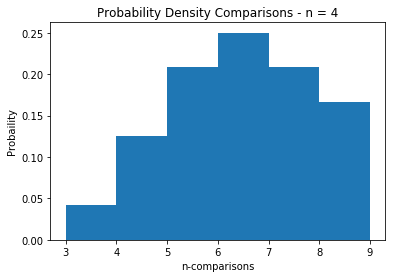


Average Comparisons: 6.0 - Min Comparisons: 3.0 - Max Comparisons: 9.0
Probabilities for Comparisons: 
P(3) = 0.0416666666667
P(4) = 0.125
P(5) = 0.208333333333
P(6) = 0.25
P(7) = 0.208333333333
P(8) = 0.125
P(9) = 0.0416666666667


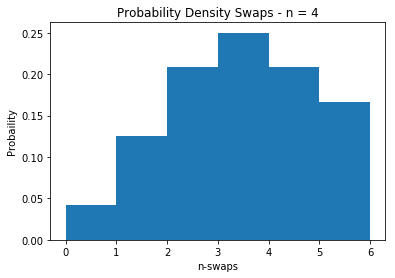


Average Swaps: 3.0 - Min Swaps: 0.0 - Max Swaps: 6.0
Probabilities for Swaps: 
P(0) = 0.0416666666667
P(1) = 0.125
P(2) = 0.208333333333
P(3) = 0.25
P(4) = 0.208333333333
P(5) = 0.125
P(6) = 0.0416666666667


In [8]:
qt = 4 #permutations
pasos,comparaciones,sw,t_loop,perm,n_perm = calc(0,n=qt)
step_hist(pasos,n_perm,qt)
comp_hist(comparaciones,n_perm,qt)
swap_hist(sw,n_perm,qt)

And for the number of comparisons performed by each number(Note that each value corresponds to [t0 t1 t2 .... tn]):

In [9]:
t_norm = np.empty(n_perm)
for i in range(n_perm):
    print ("Permutation "+ str(perm[i]) +" -> ",t_loop[i])

Permutation [0 1 2 3] ->  [ 0.  1.  1.  1.]
Permutation [0 1 3 2] ->  [ 0.  1.  1.  2.]
Permutation [0 2 1 3] ->  [ 0.  1.  2.  1.]
Permutation [0 2 3 1] ->  [ 0.  1.  1.  3.]
Permutation [0 3 1 2] ->  [ 0.  1.  2.  2.]
Permutation [0 3 2 1] ->  [ 0.  1.  2.  3.]
Permutation [1 0 2 3] ->  [ 0.  2.  1.  1.]
Permutation [1 0 3 2] ->  [ 0.  2.  1.  2.]
Permutation [1 2 0 3] ->  [ 0.  1.  3.  1.]
Permutation [1 2 3 0] ->  [ 0.  1.  1.  4.]
Permutation [1 3 0 2] ->  [ 0.  1.  3.  2.]
Permutation [1 3 2 0] ->  [ 0.  1.  2.  4.]
Permutation [2 0 1 3] ->  [ 0.  2.  2.  1.]
Permutation [2 0 3 1] ->  [ 0.  2.  1.  3.]
Permutation [2 1 0 3] ->  [ 0.  2.  3.  1.]
Permutation [2 1 3 0] ->  [ 0.  2.  1.  4.]
Permutation [2 3 0 1] ->  [ 0.  1.  3.  3.]
Permutation [2 3 1 0] ->  [ 0.  1.  3.  4.]
Permutation [3 0 1 2] ->  [ 0.  2.  2.  2.]
Permutation [3 0 2 1] ->  [ 0.  2.  2.  3.]
Permutation [3 1 0 2] ->  [ 0.  2.  3.  2.]
Permutation [3 1 2 0] ->  [ 0.  2.  2.  4.]
Permutation [3 2 0 1] ->  [ 0.  

## Samples

### Recursive Permutation Function - No itertools

Using calc(1,n=qt)

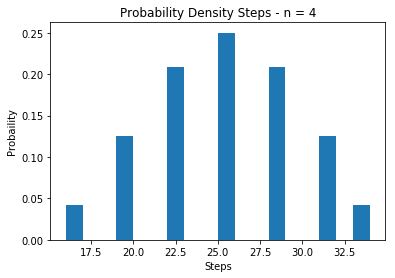


Average Steps: 25.0 - Min Steps: 16.0 - Max Steps: 34.0
Probabilities: 
P(16) = 0.0416666666667
P(19) = 0.125
P(22) = 0.208333333333
P(25) = 0.25
P(28) = 0.208333333333
P(31) = 0.125
P(34) = 0.0416666666667


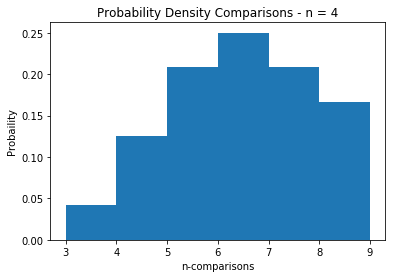


Average Comparisons: 6.0 - Min Comparisons: 3.0 - Max Comparisons: 9.0
Probabilities for Comparisons: 
P(3) = 0.0416666666667
P(4) = 0.125
P(5) = 0.208333333333
P(6) = 0.25
P(7) = 0.208333333333
P(8) = 0.125
P(9) = 0.0416666666667


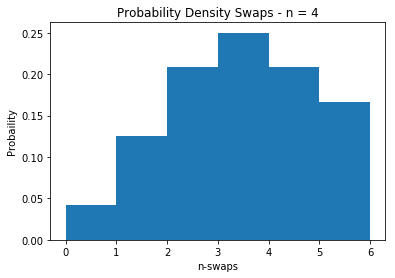


Average Swaps: 3.0 - Min Swaps: 0.0 - Max Swaps: 6.0
Probabilities for Swaps: 
P(0) = 0.0416666666667
P(1) = 0.125
P(2) = 0.208333333333
P(3) = 0.25
P(4) = 0.208333333333
P(5) = 0.125
P(6) = 0.0416666666667


In [10]:
#Call the function
qt=4
pasos,comparaciones,sw,t_loop,perm,n_perm = calc(1,n=qt)
step_hist(pasos,n_perm,qt)
comp_hist(comparaciones,n_perm,qt)
swap_hist(sw,n_perm,qt)

### Random Permutations

Here we test the same, but instead of using all permutations, we decide to take $m$ random permutations of $n$ numbers

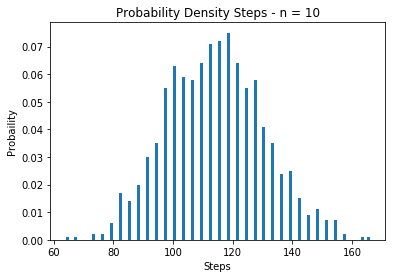


Average Steps: 113.68 - Min Steps: 64.0 - Max Steps: 166.0
Probabilities: 
P(64) = 0.001
P(67) = 0.001
P(73) = 0.002
P(76) = 0.002
P(79) = 0.006
P(82) = 0.017
P(85) = 0.014
P(88) = 0.02
P(91) = 0.03
P(94) = 0.035
P(97) = 0.055
P(100) = 0.063
P(103) = 0.059
P(106) = 0.058
P(109) = 0.064
P(112) = 0.071
P(115) = 0.072
P(118) = 0.075
P(121) = 0.064
P(124) = 0.055
P(127) = 0.058
P(130) = 0.041
P(133) = 0.035
P(136) = 0.024
P(139) = 0.025
P(142) = 0.015
P(145) = 0.009
P(148) = 0.011
P(151) = 0.007
P(154) = 0.007
P(157) = 0.002
P(163) = 0.001
P(166) = 0.001


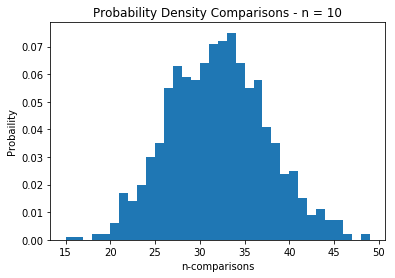


Average Comparisons: 31.56 - Min Comparisons: 15.0 - Max Comparisons: 49.0
Probabilities for Comparisons: 
P(15) = 0.001
P(16) = 0.001
P(18) = 0.002
P(19) = 0.002
P(20) = 0.006
P(21) = 0.017
P(22) = 0.014
P(23) = 0.02
P(24) = 0.03
P(25) = 0.035
P(26) = 0.055
P(27) = 0.063
P(28) = 0.059
P(29) = 0.058
P(30) = 0.064
P(31) = 0.071
P(32) = 0.072
P(33) = 0.075
P(34) = 0.064
P(35) = 0.055
P(36) = 0.058
P(37) = 0.041
P(38) = 0.035
P(39) = 0.024
P(40) = 0.025
P(41) = 0.015
P(42) = 0.009
P(43) = 0.011
P(44) = 0.007
P(45) = 0.007
P(46) = 0.002
P(48) = 0.001
P(49) = 0.001


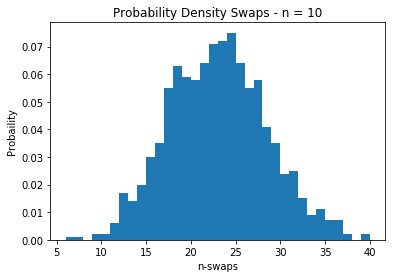


Average Swaps: 22.56 - Min Swaps: 6.0 - Max Swaps: 40.0
Probabilities for Swaps: 
P(6) = 0.001
P(7) = 0.001
P(9) = 0.002
P(10) = 0.002
P(11) = 0.006
P(12) = 0.017
P(13) = 0.014
P(14) = 0.02
P(15) = 0.03
P(16) = 0.035
P(17) = 0.055
P(18) = 0.063
P(19) = 0.059
P(20) = 0.058
P(21) = 0.064
P(22) = 0.071
P(23) = 0.072
P(24) = 0.075
P(25) = 0.064
P(26) = 0.055
P(27) = 0.058
P(28) = 0.041
P(29) = 0.035
P(30) = 0.024
P(31) = 0.025
P(32) = 0.015
P(33) = 0.009
P(34) = 0.011
P(35) = 0.007
P(36) = 0.007
P(37) = 0.002
P(39) = 0.001
P(40) = 0.001


In [11]:
#Call the function
qt,rand_amount = 10,1000
pasos,comparaciones,sw,t_loop,perm,n_perm = calc(2,n=qt,m=rand_amount)

step_hist(pasos,n_perm,qt)
comp_hist(comparaciones,n_perm,qt)
swap_hist(sw,n_perm,qt)

# Performance Comparison Between Itertools and Recursive

In order to compare the performance between itertools.permutations() and MyPerm.perutations(), we set a 3 seconds limit to determine how many permutations can be performed.

In [15]:
# As seen in http://code.activestate.com/recipes/534115-function-timeout/
import signal

def iterT(n): #Itertools
    np.array(list(itertools.permutations(range(n))))

def rec(n): #Recursive
    e = MyPerm()
    e.permutations(n)

## Itertools

In [18]:
def timeout(signum, frame):
    raise TimeoutError

for i in range(100):
    signal.signal(signal.SIGALRM,timeout)
    signal.alarm(10)
    try:
        t0 = time.clock()
        iterT(i)
        print(i,'=',time.clock()-t0)
    except TimeoutError:
        print('TLE at:',i)
        break
    

0 = 2.1000000003823516e-05
1 = 2.800000000036107e-05
2 = 1.2999999995599865e-05
3 = 1.2999999995599865e-05
4 = 2.5000000000829914e-05
5 = 0.00010000000000331966
6 = 0.0005310000000022796
7 = 0.003982000000000596
8 = 0.03466399999999936
9 = 0.2805149999999941
10 = 2.9960510000000014


TimeoutError: 

###### Note that we stopped the process manually because it filled all the ram and swap.

## Recursive

In [19]:
for i in range(100):
    signal.signal(signal.SIGALRM,timeout)
    signal.alarm(4)
    try:
        t0 = time.clock()
        rec(i)
        print(i,'=',time.clock()-t0)
    except TimeoutError:
        print('TLE at:',i)
        break
    

0 = 1.9000000001767603e-05
1 = 3.199999999736747e-05
2 = 3.799999999642978e-05
3 = 6.700000000137152e-05
4 = 0.00023199999999690135
5 = 0.0011419999999944253
6 = 0.0038489999999953284
7 = 0.01893400000000156
8 = 0.21610499999999888
9 = 1.5719150000000042
TLE at: 10


Aparentlly the performance of the recursive one is better than itertools, but in general terms, after 10 the process of generating all the permutations takes a lot of time and memory.